# Introduction to Data Science 2021

# Week 3

## Exercise 1 | Working with geospatial data (GIS)

To get at least a bit familiar with [GIS](https://en.wikipedia.org/wiki/Geographic_information_system) data and the concept of map projections, we’ll do a simple task of plotting two data sets that are given in different coordinate systems.

1. Download the [world_m.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/world_m.zip) and [cities.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/cities.zip) files that each include a set of GIS files. Most notably, the <span style="background-color: #ccfff2">shp</span> files are [Shapefile-files](https://en.wikipedia.org/wiki/Shapefile) with coordinates (don’t look, it’s binary!). The <span style="background-color: #ccfff2">prj</span> files contain information (in plain text, so okay to look) about the coordinate systems. Open the files using your favorite programming environment and packages.  

    <span style="background-color: #ccfff2"> *Hint: We warmly recommend [Geopandas](http://geopandas.org/) for pythonistas.*</span>

In [6]:
import geopandas as gpd
# Note: I had a LOT of hassle to get geopandas to work with Jupyter. Solution for that found in:
# https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

world_map = gpd.read_file(r'C:\Users\Diana Crowe\Documents\Classes\Introduction to Data Science\Exercises\GIS-data\world_m.shp')
cities = gpd.read_file(r'C:\Users\Diana Crowe\Documents\Classes\Introduction to Data Science\Exercises\GIS-data\cities.shp')



2. The <span style="background-color: #ccfff2">world_m</span> file contains borders of almost all countries in the world. Plot the world.

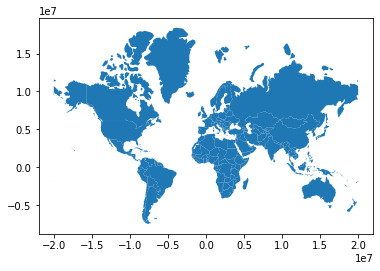

In [21]:
base = world_map.plot() 



3. On top of the countries that you just plotted, plot another layer of information, namely the capital cities of each country from the <span style="background-color: #ccfff2">cities</span> data-set. However, depending on how clever your programming environment is, the cities will probably all appear to be in the Gulf of Guinea, near the coordinates (0°, 0°).

<AxesSubplot:>

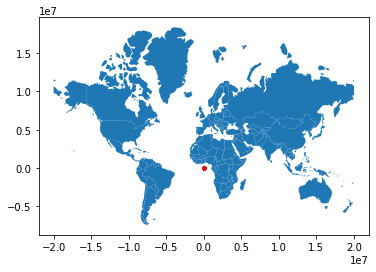

In [20]:
base = world_map.plot() 
cities.plot(ax=base, marker='o', color='red', markersize=5)


4. Perform a map projection to bring the two data-sets into a shared coordinate system. (You can choose which one.) Now plot the two layers together to make sure the capital cities are where they are supposed to be.

<AxesSubplot:>

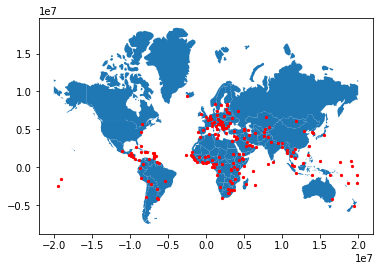

In [22]:
# the base map is in a Mercator format, so we'll now convert the cities into the same format:
cities_merc = cities.to_crs(epsg=3395)
base = world_map.plot() 
cities_merc.plot(ax=base, marker='o', color='red', markersize=5)

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification

We’ll be looking into machine learning by checking out the [HASYv2](https://zenodo.org/record/259444#.Wb7efZ8xDhZ) dataset that contains hand written mathematical symbols as images. The whole dataset is quite big, so we’ll restrict ourselves to doing 10-class classification on some of the symbols. Download the data and complete the following tasks.

1. Extract the data and find inside a file called <span style="background-color: #ccfff2">hasy-data-labels.csv</span>. This file contains the labels for each of the images in the <span style="background-color: #ccfff2">hasy_data</span> folder. Read the labels in and only keep the rows where the <span style="background-color: #ccfff2">symbol_id</span> is within the inclusive range <span style="background-color: #ccfff2">[70, 80]</span>. Read the corresponding images as black-and-white images and flatten them so that each image is a single vector of shape <span style="background-color: #ccfff2">32x32 = 1024</span>. Your dataset should now consist of your input data of shape <span style="background-color: #ccfff2">(1020, 1024)</span> and your labels of shape <span style="background-color: #ccfff2">(1020, )</span>. That is, a matrix of shape <span style="background-color: #ccfff2">1020 x 1024</span> and a vector of size <span style="background-color: #ccfff2">1020</span>.

In [56]:
import pandas as pd
import imageio

# reading the csv file with the labels
df=pd.read_csv(r'C:\Users\Diana Crowe\Documents\Classes\Introduction to Data Science\Exercises\HASYv2\hasy-data-labels.csv') 

#print(df.head())     # uncomment to have a quick look at what I just read

# keeping only the rows with symbol_id between 70 and 80:
df = df[df['symbol_id'].between(70, 80)]

print(df.shape)        # yields (1020, 4)

print(df.head())     # uncomment to have a quick look at what I just read

# Now, for the flattening:
# initializing storage variables:
flat_pics = []
pic_labels = []

# Note: Pandas DataFrame.iterrows() is used to iterate over a pandas Data frame rows in the form of (index, series) pair.
for i, row in df.iterrows():
    print(row['path'])    # this confirms that row['path'] gets the correct image names from the correct directory
    pic = imageio.imread(row['path'])   
    # flattening the grey version of the picture
    flat_pics = pic.asgray()     # Instead of flatten, use the as_gray keyword argument when using imageio instead of scipy's imread
    flat_pics.append(pic)
    pic_labels.append(row['latex'])
    




(1020, 4)
                       path  symbol_id latex  user_id
345  hasy-data/v2-00345.png         70     0       10
346  hasy-data/v2-00346.png         70     0       31
347  hasy-data/v2-00347.png         70     0       10
348  hasy-data/v2-00348.png         70     0       10
349  hasy-data/v2-00349.png         70     0       10
hasy-data/v2-00345.png


FileNotFoundError: No such file: 'C:\Users\Diana Crowe\Documents\Classes\Introduction to Data Science\Exercises\hasy-data\v2-00345.png'

2. Shuffle the data, and then split it into training and test sets, using the first 80% of the data for training and the rest for evaluation.

In [6]:
# Use this cell for your code

3. Fit a logistic regression classifier on your data. Note that we have a multi-class classification problem, but the logistic regression is a binary classifier. For this reason, you will find useful <span style="background-color: #ccfff2">[Sklearn's "multi_class" attribute](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</span>. Use a multinomial loss, and the softmax function to predict the probability of each class as the outcome.  The classifier should select the class with the highest probability. Most library implementations will do this for you - feel free to use one.

In [7]:
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix
#model = LogisticRegression(solver='liblinear', random_state=0)
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

4. To get an idea of how good the model did, let’s create our own classifier that simply guesses the most common class in the training set (looking at the test set here would be cheating!). Then, evaluate your logistic regression model on the test data, and compare it to the majority class classifier. The logistic regression model should have significantly better accuracy - our naive model is merely making a guess.

In [8]:
# Use this cell for your code

5. Plot some of the images that the logistic classifier classified wrongly. Can you think of why this happens? Would you have gotten it right?
    
    <span style="background-color: #ccfff2">*Hint: Scipy has a [function](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imshow.html) for this.*</span>

Here are some examples of the syntax used to fit a logistic regression classifier (using Sklearn or statsmodel with Python, or GLM with R):

In [9]:
#Sklearn (python)

#from sklearn.linear_model import LogisticRegression

#Fit on the training data set, with:
#X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
#with attributes that describe each sample.
#y : array-like, shape (n_samples,) , n_samples target values for each sample.

#model = LogisticRegression()
#model.fit(X, y) 

In [10]:
#Statsmodels (python)

#import statsmodels.api as sm
#model = sm.Logit(y, X)

In [11]:
#GLM (R)

#model <- glm(y ~.,family=binomial(link='logit'), data=X) 

In [12]:
# Use this cell for your code

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**